# Titanic

### A.k.a The titanic failure in trying to improve @skanev and @lacho results

Днес ще explore-ваме данните от [Titanic competition](https://www.kaggle.com/c/titanic) в Kaggle. Целта ни е да повишим score-а на двамата лектори - Стефан Кънев и Лъчезар Божков (може би е само на Стефан, не съм сигурен) от `0.78947`. Преди това, импортите:

In [197]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


%matplotlib inline

и малко default settings

In [198]:
pd.options.display.max_rows = 30
sns.set()

Готови сме да започваме!

## 1. Data Exploration

Преди да можем да тренираме каквото и да е било първо трябва да заредим, разгледаме, разчистим, инженерстваме и енкоуднем данните. Това ще правим в първата част на този ноутбук. 

Като за начало данните са разделени на два сета: train и test. Train сета съдържа цялата информация, a тест сета не съдържа информация за това дали човека е оцелял или не. Идеята на тест сета е да събмитнем "предсказанията" си и да видим на кое място ще се наредим сред 9k+ хората който са качили решенията си в Kaggle.

### 1.1 Import

In [199]:
original_data = pd.read_csv('train.csv', index_col='PassengerId')
original_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


Още на пръв поглед виждаме първия ни проблем. В колоната Cabin има твърде много N/A стойности. Нека видим точно колко:

In [200]:
original_data['Cabin'].isna().sum()

687

Това са доста повече от колкото очаквах. Не съм сигурен дали изобщо ще можем да използваме тази колона по какъвто и да е било начин. Но преди да правим каквото и нека видим description-a на данните:

In [201]:
original_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Tова е информацията за числовите колони в dataframe-а. Виждаме, че най-вероятно ще ни се наложи да гадаем възрастта на част от пътниците. Всички останали числови колони изглеждат запълнени. Нека проверим и нечисловите:

In [202]:
non_numeric_columns = [column for column in original_data.columns.tolist() if not column in original_data.describe().columns.tolist()]
[(column, type(original_data[column].dropna().iloc[0]), len(original_data[column].replace('', np.nan).dropna())) for column in non_numeric_columns]

[('Name', str, 891),
 ('Sex', str, 891),
 ('Ticket', str, 891),
 ('Cabin', str, 204),
 ('Embarked', str, 889)]

Виждаме че нямаме информация и за това от къде са се качили двама от пътниците. За тях ще можем да направим нова стойност която ще отговаря за това че не знаем. Нека направим clone на оригиналната data.

In [203]:
data = original_data.copy()

Нека си направим baseline модел по-който да следим прогреса си. За него ще използваме само numeric колоните и ще попълним nan-овете на age с 0.

In [204]:
numeric_data = data[data.describe().columns]
numeric_data

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500
6,0,3,NaN,0,0,8.4583
7,0,1,54.0,0,0,51.8625
8,0,3,2.0,3,1,21.0750
9,1,3,27.0,0,2,11.1333


In [205]:
numeric_data = numeric_data.fillna(0)
numeric_data

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500
6,0,3,0.0,0,0,8.4583
7,0,1,54.0,0,0,51.8625
8,0,3,2.0,3,1,21.0750
9,1,3,27.0,0,2,11.1333


Между другото ми е интересно да видя възрастовото разпледеление на пътниците, затова:

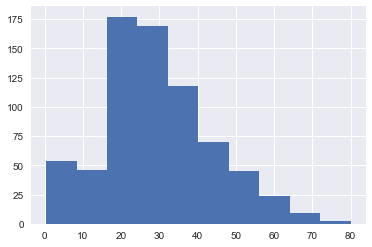

In [206]:
original_data['Age'].hist();

и след като занулихме:

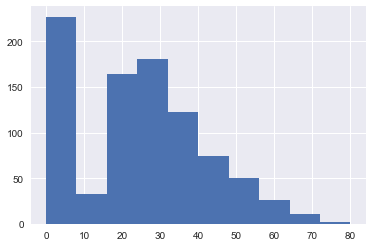

In [207]:
numeric_data['Age'].hist();

Back on track ...

### Baseline model

За baseline model-а ще използваме логистична регресия.

In [208]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = numeric_data.drop(['Survived'], axis = 1)
y = numeric_data['Survived']

# Избираме random_state = 0 за да можем да сравняваме с резултатите получени от skanev
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, stratify = y)


regressor = LogisticRegression()
regressor.fit(X_train, y_train)
train_score = regressor.score(X_train, y_train)
test_score  = regressor.score(X_test,  y_test)
print("Train score", train_score)
print("Test score", test_score)

Train score 0.709580838323
Test score 0.686098654709


Модела не отгатва твърде зле (по-добре е от cointoss, което общо взето автоматично го прави и по-добър от по-голямата част от гадателките), но много лесно можем да направим минимален improvement, като добавим малко по-добро "предсказване" за незнайните възрасти.

In [209]:
X['Age'] = original_data['Age'].fillna(original_data['Age'].mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, stratify = y)


regressor = LogisticRegression()
regressor.fit(X_train, y_train)
train_with_mean_score = regressor.score(X_train, y_train)
test_with_mean_score  = regressor.score(X_test,  y_test)
print("Train score", train_with_mean_score)
print("Test score",  test_with_mean_score)
print("Diff train",  train_with_mean_score - train_score)
print("Diff test",   test_with_mean_score - test_score)

Train score 0.708083832335
Test score 0.695067264574
Diff train -0.00149700598802
Diff test 0.00896860986547


Така веднага видяхме микроскопично подобрение в трейн сет-а. За възрастта ще направим повече по-късно.

### Title
Когато погледнем имената можем да видим, че там се крият титлите на хората. По-голямата част от хората ще са просто Mr. или Mrs., но може би богаташите, на които са били дадени спасителни лодки, ще носят по-интересни титли.

In [210]:
regex = r".*,\s([A-Za-z]+\.)"
titles = data.Name.str.extract(regex)
titles.value_counts()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Col.           2
Mlle.          2
Major.         2
Ms.            1
Sir.           1
Capt.          1
Don.           1
Jonkheer.      1
Lady.          1
Mme.           1
Name: Name, dtype: int64

Тук имаме някои много интересни honorifics. За надало Mlle = Mademoiselle = Miss, Mme = Madame = Mrs. Lady, която най-вероятно ще сложим към Mrs. Don, Sir, Jonkheer са титли на благородници от мъжки пол, така че ще е добре да ги съберем на едно и също място, както Major. Col. и Capt. са военни. Тъй като воените може би са по склонни към самопожертвувание ще ги отделим от останалите мъжки титили. Всъщност можем да го проверим, но след като си напишем функция която да ни дава правилни титли.

In [211]:
import re

def title_conversion(name):
    srch = re.search(r".*,\s([A-Za-z]+\.)", name)
    if srch:
        title = srch.group(1)
        if title in ["Miss.", "Mlle."]:
            return "Miss."
        if title in ["Mrs.", "Mme.", "Lady.", "Ms."]:
            return "Mrs."
        if title in ["Mr.", "Dr.", "Rev."]:
            return "Mr."
        if title in ["Don.", "Sir.", "Jonkheer.", "Dona."]:
            return "Don."
        if title in ["Major.", "Col.", "Capt."]:
            return "Major."
    return "Other."
    
titles = [title_conversion(name) for name in data['Name']]
pd.Series(titles).value_counts()

Mr.       530
Miss.     184
Mrs.      128
Other.     41
Major.      5
Don.        3
dtype: int64

Така намалихме броя на title-ите, без да се отказваме от смисъла зад тях.

Нека бъдем fancy и си направим трансформатор използващ функцията по-горе.

In [212]:
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin

class AddTitleTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        None
    def fit(self, X = None, y = None):
        None
    def transform(self, X):
        for index, row in X.iterrows():
            X.loc[index, 'Title'] = title_conversion(row['Name'])
        return X

AddTitleTransformer().transform(data)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr.
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr.
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Other.
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs.


In [213]:
data['Title'].value_counts()

Mr.       530
Miss.     184
Mrs.      128
Other.     41
Major.      5
Don.        3
Name: Title, dtype: int64

In [214]:
data.loc[data['Title'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,


Нека се опитаме да разгледаме `Cabin`.

In [215]:
data['Cabin'].dropna()

PassengerId
2              C85
4             C123
7              E46
11              G6
12            C103
22             D56
24              A6
28     C23 C25 C27
32             B78
53             D33
55             B30
56             C52
62             B28
63             C83
67             F33
          ...     
821            B69
824           E121
830            B28
836            E49
840            C47
850            C92
854            D28
858            E17
863            D17
868            A24
872            D35
873    B51 B53 B55
880            C50
888            B42
890           C148
Name: Cabin, Length: 204, dtype: object

Веднага забелязваме че кабините са във формата `[[:alpha:]][[:digit:]]+`. `[[:alpha:]]` може би са етажите на кораба, което вероятно ще ни даде още един показател за прослойката. Също така може да е имало етажи който са били с повече смъртни случаи на базата на това че не са имали как да излязат на палубата. Проблем е че има някои които са с по няколко entry-та, но можем да проверим дали те винаги имат една и съща първа буква и ако е така да вземем нея.

In [216]:
data['Cabin'][data['Cabin'].str.match(r".*\s.*").fillna(False)]

PassengerId
28         C23 C25 C27
76               F G73
89         C23 C25 C27
98             D10 D12
119            B58 B60
129              F E69
298            C22 C26
300            B58 B60
306            C22 C26
312    B57 B59 B63 B66
342        C23 C25 C27
391            B96 B98
436            B96 B98
439        C23 C25 C27
499            C22 C26
680        B51 B53 B55
700              F G63
701            C62 C64
716              F G73
743    B57 B59 B63 B66
764            B96 B98
790            B82 B84
803            B96 B98
873        B51 B53 B55
Name: Cabin, dtype: object

Виждаме че има някои който имат по две кабини. След малък research в wikipedia, разбрах че deck-овете са наредени по престиж в намаляващ ред, така че когато имаме няколко, ще предпочитаме най-престижния. За N/A стойности ще използваме 'Z'

In [217]:
def fit_transform_cabin_to_deck(X):
    cabins = X['Cabin'].fillna('Z').map(lambda cabin: min(cabin.split(' ')))
    for index, row in X.iterrows():
        regexp_result = re.search(r"([A-Z]).*", cabins[index])
        if regexp_result:
            X.loc[index, 'Deck'] = regexp_result.group(1)
        else:
            X.loc[index, 'Deck'] = X.loc[index, 'Cabin']
    return X.drop(['Cabin'], axis=1)
data = fit_transform_cabin_to_deck(data)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr.,Z
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs.,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.,Z
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs.,C
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr.,Z
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,Mr.,Z
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,Mr.,E
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,Other.,Z
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,Mrs.,Z


Нека разгледаме хистограмата на deck-овете

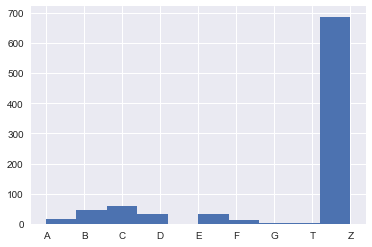

In [218]:
data['Deck'].hist();

In [219]:
data['Deck'].value_counts()

Z    687
C     59
B     47
D     33
E     33
A     15
F     12
G      4
T      1
Name: Deck, dtype: int64

### Parent-child & sibling-spouse

Нека направим две колони свързани с общия брой на роднините на кораба. Едната ще е сумата на двете съществуващи колони, а другата ще е сумата на двете съществуващи колони умножена по коефициент (-1 за мъже , 1 за жени), репрезентираща за колко човека трябва да се грижиш/ се грижат за теб. Запознат съм с факта, че това може да прозвучи доста сексистко, но данните ще покажат.

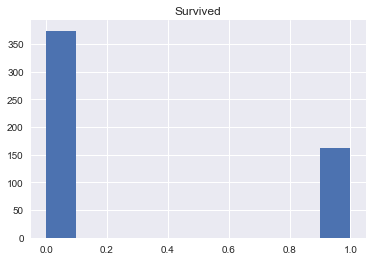

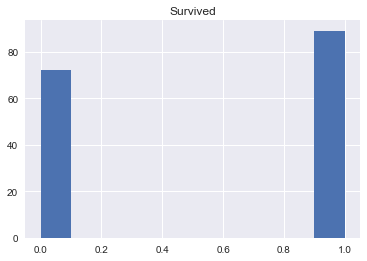

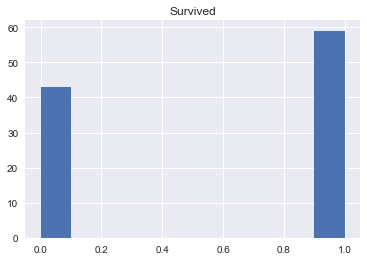

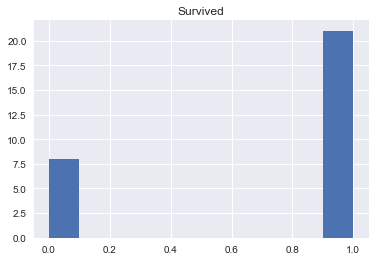

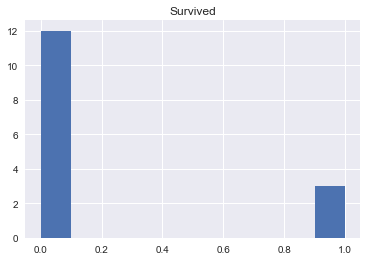

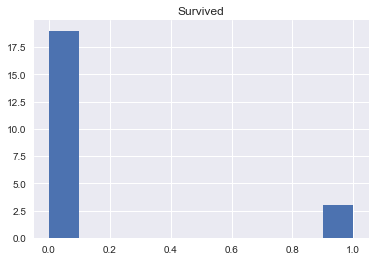

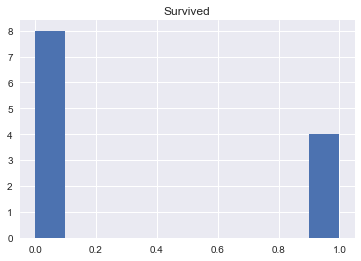

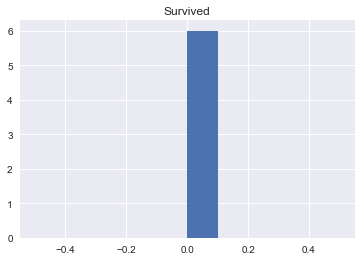

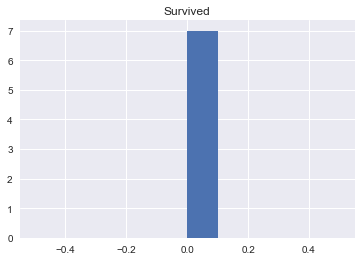

In [220]:
data['Family'] = data['SibSp'] + data['Parch']
data['Caretaking'] = (data['Sex'] == 'female').replace(False, -1) * data['Family']
data.groupby(['Family']).hist('Survived');

От хистограмите виждаме, че хората който са пътували с още 1, 2 или 3 члена на семейството са имали по-голям шанс да оцелеят. По-големите семейства може да бъдат смятани за outlier-и тъй като нямаме достатъчно данни. Нека да видим как изглеждат данните ни до момента.

In [221]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck,Family,Caretaking
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr.,Z,1,-1.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs.,C,1,1.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.,Z,0,0.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs.,C,1,1.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr.,Z,0,-0.0
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,Mr.,Z,0,-0.0
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,Mr.,E,0,-0.0
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,Other.,Z,4,-4.0
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,Mrs.,Z,2,2.0


Нека пробваме да вземем новите добавени numeric данни и да видим дали ще допринесат за повишаването на score-a.

In [222]:
numeric_columns = data.describe().columns
X = data[numeric_columns]
X['Age'] = original_data['Age'].fillna(original_data['Age'].mean())
X = X.drop(['Survived'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, stratify = y)


regressor = LogisticRegression()
regressor.fit(X_train, y_train)
train_with_family_score = regressor.score(X_train, y_train)
test_with_family_score  = regressor.score(X_test,  y_test)

print("Train score", train_with_family_score)
print("Test score",  test_with_family_score)
print("Diff train",  train_with_family_score - train_with_mean_score)
print("Diff test",   test_with_family_score - test_with_mean_score)

Train score 0.706586826347
Test score 0.708520179372
Diff train -0.00149700598802
Diff test 0.0134529147982


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Виждаме нарастване, което винаги е добър знак. Но казахме, че ще се опитаме да направим нещо по-специално за възрастта.

### Age

Нека се опитаме да предсказваме възрастта на пътниците за които нямаме информация. За момента ще използваме само numeric данните. Ако имаме improvement, ще го направим отново когато encode-нем всички данни.

In [223]:
from sklearn.linear_model import LinearRegression
X = data[numeric_columns].drop(['Survived'], axis=1)
X_with_age = X[X['Age'].notnull()]
X_without_age = X_with_age.drop(['Age'], axis=1)
y_age = X_with_age['Age']

X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(X_without_age, y_age, random_state=2)

model = LinearRegression()
model.fit(X_train_age, y_train_age)
age_train_score = model.score(X_train_age, y_train_age)
age_test_score  = model.score(X_test_age, y_test_age)

print('Train score', age_train_score)
print('Test score',  age_test_score)


Train score 0.22973795386
Test score 0.183416136919


Gosh, това беше доста по-зле от колкото очаквах и имаме сериозен overfit. Нека пробваме с Ridge.

In [224]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

grid = {'alpha': [10**i for i in range(-2,3)]}

search = GridSearchCV(Ridge(), param_grid=grid)
search.fit(X_train_age, y_train_age)
pd.DataFrame(search.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.001650,0.000573,0.213848,0.232484,0.01,{'alpha': 0.01},4,0.271546,0.198199,0.199555,0.238066,0.170119,0.261187,0.000090,0.000082,0.042638,0.026016
1,0.001615,0.000515,0.213853,0.232484,0.1,{'alpha': 0.1},3,0.271522,0.198199,0.199595,0.238066,0.170119,0.261187,0.000087,0.000013,0.042623,0.026016
2,0.001753,0.000518,0.213905,0.232481,1,{'alpha': 1},2,0.271285,0.198196,0.199992,0.238063,0.170116,0.261183,0.000159,0.000012,0.042473,0.026016
3,0.001660,0.000577,0.214110,0.232188,10,{'alpha': 10},1,0.268836,0.197953,0.203322,0.237748,0.169865,0.260863,0.000084,0.000083,0.041135,0.025982
4,0.001887,0.000568,0.203403,0.219117,100,{'alpha': 100},5,0.243638,0.186778,0.207261,0.223877,0.159084,0.246696,0.000216,0.000007,0.034642,0.024692


Така е много по-приемливо. Изглежда че alpha около 10 върши чудеса. Нека поровим за малко по-добра стойност.

In [225]:
grid = {'alpha': [5, 7.5, 10, 12.5, 15, 20, 50]}

search = GridSearchCV(Ridge(), param_grid=grid)
search.fit(X_train_age, y_train_age)
age_estimator = search.best_estimator_
pd.DataFrame(search.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.002052,0.000579,0.214063,0.232406,5,{'alpha': 5},4,0.270212,0.198134,0.201609,0.237982,0.170051,0.261101,0.000384,0.000021,0.041844,0.026007
1,0.002526,0.000935,0.214106,0.232313,7.5,{'alpha': 7.5},2,0.269528,0.198057,0.202505,0.237882,0.169972,0.261000,0.000493,0.000209,0.041480,0.025996
2,0.002352,0.000997,0.214110,0.232188,10,{'alpha': 10},1,0.268836,0.197953,0.203322,0.237748,0.169865,0.260863,0.000780,0.000125,0.041135,0.025982
3,0.001853,0.000563,0.214079,0.232034,12.5,{'alpha': 12.5},3,0.268135,0.197825,0.204064,0.237583,0.169734,0.260695,0.000173,0.000013,0.040808,0.025965
4,0.002498,0.000788,0.214016,0.231854,15,{'alpha': 15},5,0.267428,0.197675,0.204738,0.237389,0.169581,0.260498,0.000464,0.000109,0.040498,0.025945
5,0.002212,0.000889,0.213801,0.231422,20,{'alpha': 20},6,0.266000,0.197313,0.205897,0.236925,0.169214,0.260027,0.000656,0.000109,0.039923,0.025897
6,0.002086,0.000614,0.210866,0.227511,50,{'alpha': 50},7,0.257310,0.194004,0.209083,0.232753,0.165942,0.255777,0.000427,0.000055,0.037339,0.025490


Изглежда че 7.5 е нашия победител. Преди да пуснем predict-а нека видим до колко беше точен prediction-а който използвахме до момента.

In [226]:
from sklearn.dummy import DummyRegressor

dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train_age, y_train_age)
dummy_age_train_score = dummy.score(X_train_age, y_train_age)
dummy_age_test_score = dummy.score(X_test_age, y_test_age)

print(dummy_age_train_score, dummy_age_test_score)
print(X_train_age.columns)

0.0 -0.0221826009752
Index(['Pclass', 'SibSp', 'Parch', 'Fare', 'Family', 'Caretaking'], dtype='object')


Не е като да очаквахме друго, но е доста приятно да видим разликата. Нека също така видим какво получаваме и разликата с познатите ни данни.

In [227]:
pd.DataFrame([X_with_age['Age'].reindex(), age_estimator.predict(X_without_age)])[list(range(1,6))]

PassengerId,1,2,3,4,5
Age,22.00000,38.000000,26.000000,35.000000,35.000000
Unnamed 0,36.42259,27.297765,36.630864,27.296333,39.451766


Нека направим ново копие на оригиналните данни в което да имаме новите възрасти.

In [228]:
X_to_predict_age = X[X['Age'].isnull()]
predicted_age = age_estimator.predict(X_to_predict_age.drop(['Age'], axis=1)) 
data2 = data.copy()
data2.loc[data2['Age'].isna(), 'Age'] = predicted_age
pd.DataFrame([data2['Age'], data['Age']])

PassengerId,1,2,3,4,5,6,7,8,9,10,...,882,883,884,885,886,887,888,889,890,891
Age,22.0,38.0,26.0,35.0,35.0,27.291656,54.0,2.0,27.0,14.0,...,33.0,22.0,28.0,25.0,39.0,27.0,19.0,21.052118,26.0,32.0
Age,22.0,38.0,26.0,35.0,35.0,NaN,54.0,2.0,27.0,14.0,...,33.0,22.0,28.0,25.0,39.0,27.0,19.0,NaN,26.0,32.0


In [229]:
data2

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck,Family,Caretaking
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Mr.,Z,1,-1.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Mrs.,C,1,1.0
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Miss.,Z,0,0.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Mrs.,C,1,1.0
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Mr.,Z,0,-0.0
6,0,3,"Moran, Mr. James",male,27.291656,0,0,330877,8.4583,Q,Mr.,Z,0,-0.0
7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,Mr.,E,0,-0.0
8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S,Other.,Z,4,-4.0
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S,Mrs.,Z,2,2.0


Нека отново видим дали сме повишили score-a на numeric колоните.

In [230]:
numeric_columns = data2.describe().columns
X = data2[numeric_columns]
X = X.drop(['Survived'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, stratify = y)


regressor = LogisticRegression()
regressor.fit(X_train, y_train)
train_with_age_score = regressor.score(X_train, y_train)
test_with_age_score  = regressor.score(X_test,  y_test)

print("Train score", train_with_age_score)
print("Test score",  test_with_age_score)
print("Diff train",  train_with_age_score - train_with_family_score)
print("Diff test",   test_with_age_score - test_with_family_score)

Train score 0.706586826347
Test score 0.708520179372
Diff train 0.0
Diff test 0.0


**Имаме нова дефиниция за anticlimactic ...**

## Encode-ване на данните

Ще трябва да encode-нем данните който все още не са numeric. Нека първо ги видим:

In [231]:
non_numeric_columns = [column for column in data2.columns if not column in data2.describe().columns]
data2[non_numeric_columns].loc[list(range(1, 11))]

,Name,Sex,Ticket,Embarked,Title,Deck
PassengerId,,,,,,
1,"Braund, Mr. Owen Harris",male,A/5 21171,S,Mr.,Z
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C,Mrs.,C
3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S,Miss.,Z
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S,Mrs.,C
5,"Allen, Mr. William Henry",male,373450,S,Mr.,Z
6,"Moran, Mr. James",male,330877,Q,Mr.,Z
7,"McCarthy, Mr. Timothy J",male,17463,S,Mr.,E
8,"Palsson, Master. Gosta Leonard",male,349909,S,Other.,Z
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,347742,S,Mrs.,Z


План за действие:
1. Дропваме имена и номера на билети
2. OneHotEncode-ваме пол, отплаване и титла - Те са колони които нямат подредба
3. LabelEncode-ваме deck, тъй като има някаква подредба на дековете. Ако LabelEncoder не ни дава желаните резултати, го правим на ръка.

In [232]:
class DropTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        None
    def fit(self, X = None, y = None):
        return self
    def transform(self, X):
        if 'Survived' in X.columns:
            X = X.drop(['Survived'], axis=1)
        return X.drop(['Name', 'Ticket'], axis=1)
    
DropTransformer().transform(data2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deck,Family,Caretaking
PassengerId,,,,,,,,,,,
1,3,male,22.000000,1,0,7.2500,S,Mr.,Z,1,-1.0
2,1,female,38.000000,1,0,71.2833,C,Mrs.,C,1,1.0
3,3,female,26.000000,0,0,7.9250,S,Miss.,Z,0,0.0
4,1,female,35.000000,1,0,53.1000,S,Mrs.,C,1,1.0
5,3,male,35.000000,0,0,8.0500,S,Mr.,Z,0,-0.0
6,3,male,27.291656,0,0,8.4583,Q,Mr.,Z,0,-0.0
7,1,male,54.000000,0,0,51.8625,S,Mr.,E,0,-0.0
8,3,male,2.000000,3,1,21.0750,S,Other.,Z,4,-4.0
9,3,female,27.000000,0,2,11.1333,S,Mrs.,Z,2,2.0


In [233]:
class SexTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        None
    def fit(self, X, y = None):
        return self
    def transform(self, X):
        result = {'is_male': [], 'is_female': [], 'PassengerId': []}
        for index, value in X['Sex'].iteritems():
                result['is_male'].append(value == 'male')
                result['is_female'].append(value == 'female')
                result['PassengerId'].append(index)
        result = pd.DataFrame(result).set_index('PassengerId')
        return X.merge(result, left_index = True, right_index = True).drop(['Sex'], axis=1)
        
SexTransformer().fit_transform(data2)

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck,Family,Caretaking,is_female,is_male
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,S,Mr.,Z,1,-1.0,False,True
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C,Mrs.,C,1,1.0,True,False
3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,S,Miss.,Z,0,0.0,True,False
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,S,Mrs.,C,1,1.0,True,False
5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,S,Mr.,Z,0,-0.0,False,True
6,0,3,"Moran, Mr. James",27.291656,0,0,330877,8.4583,Q,Mr.,Z,0,-0.0,False,True
7,0,1,"McCarthy, Mr. Timothy J",54.000000,0,0,17463,51.8625,S,Mr.,E,0,-0.0,False,True
8,0,3,"Palsson, Master. Gosta Leonard",2.000000,3,1,349909,21.0750,S,Other.,Z,4,-4.0,False,True
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.000000,0,2,347742,11.1333,S,Mrs.,Z,2,2.0,True,False


In [234]:
class EmbarkTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        None
    def fit(self, X, y = None):
        return self
    def transform(self, X):
        result = {'from_c': [], 'from_q': [], 'from_s': [], 'PassengerId': []}
        for index, value in X['Embarked'].iteritems():
            result['from_q'].append(value == 'Q')
            result['from_c'].append(value == 'C')
            result['from_s'].append(value == 'S')
            result['PassengerId'].append(index)
        result = pd.DataFrame(result).set_index('PassengerId')
        return X.merge(result, left_index = True, right_index = True).drop(['Embarked'], axis=1)
        
EmbarkTransformer().fit_transform(data2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Title,Deck,Family,Caretaking,from_c,from_q,from_s
PassengerId,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Mr.,Z,1,-1.0,False,False,True
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,Mrs.,C,1,1.0,True,False,False
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Miss.,Z,0,0.0,False,False,True
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,Mrs.,C,1,1.0,False,False,True
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Mr.,Z,0,-0.0,False,False,True
6,0,3,"Moran, Mr. James",male,27.291656,0,0,330877,8.4583,Mr.,Z,0,-0.0,False,True,False
7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,Mr.,E,0,-0.0,False,False,True
8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,Other.,Z,4,-4.0,False,False,True
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,Mrs.,Z,2,2.0,False,False,True


In [235]:
class TitleTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        None
    def fit(self, X, y = None):
        self.title_set = set(X['Title'].values)
        return self
    def transform(self, X):
        result = {title: [] for title in self.title_set}
        result['PassengerId'] = []

        for index, value in X['Title'].iteritems():
            for title in self.title_set:
                result[title].append(value == title)
            result['PassengerId'].append(index)
        result = pd.DataFrame(result).set_index('PassengerId')
        return X.merge(result, left_index = True, right_index = True).drop(['Title'], axis=1)
TitleTransformer().fit_transform(data2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Family,Caretaking,Don.,Major.,Miss.,Mr.,Mrs.,Other.
PassengerId,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Z,1,-1.0,False,False,False,True,False,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,C,1,1.0,False,False,False,False,True,False
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Z,0,0.0,False,False,True,False,False,False
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,C,1,1.0,False,False,False,False,True,False
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Z,0,-0.0,False,False,False,True,False,False
6,0,3,"Moran, Mr. James",male,27.291656,0,0,330877,8.4583,Q,Z,0,-0.0,False,False,False,True,False,False
7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,E,0,-0.0,False,False,False,True,False,False
8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S,Z,4,-4.0,False,False,False,False,False,True
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S,Z,2,2.0,False,False,False,False,True,False


И нека label encode-нем deck-a

In [236]:
from sklearn.preprocessing import LabelEncoder
class DeckTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        None
    def fit(self, X, y = None):
        self.enc = LabelEncoder().fit(X['Deck'])
        return self
    def transform(self, X):
        series = pd.DataFrame(self.enc.transform(X['Deck']), index=X.index)
        clone = X.copy()
        clone['Deck'] = series
        return clone

DeckTransformer().fit_transform(data2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck,Family,Caretaking
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Mr.,8,1,-1.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Mrs.,2,1,1.0
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Miss.,8,0,0.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Mrs.,2,1,1.0
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Mr.,8,0,-0.0
6,0,3,"Moran, Mr. James",male,27.291656,0,0,330877,8.4583,Q,Mr.,8,0,-0.0
7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,Mr.,4,0,-0.0
8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S,Other.,8,4,-4.0
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S,Mrs.,8,2,2.0


In [237]:
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(DropTransformer(), SexTransformer(), EmbarkTransformer(),
                         TitleTransformer(), DeckTransformer())
data3 = pipeline.fit_transform(data2)
data3

,Pclass,Age,SibSp,Parch,Fare,Deck,Family,Caretaking,is_female,is_male,from_c,from_q,from_s,Don.,Major.,Miss.,Mr.,Mrs.,Other.
PassengerId,,,,,,,,,,,,,,,,,,,
1,3,22.000000,1,0,7.2500,8,1,-1.0,False,True,False,False,True,False,False,False,True,False,False
2,1,38.000000,1,0,71.2833,2,1,1.0,True,False,True,False,False,False,False,False,False,True,False
3,3,26.000000,0,0,7.9250,8,0,0.0,True,False,False,False,True,False,False,True,False,False,False
4,1,35.000000,1,0,53.1000,2,1,1.0,True,False,False,False,True,False,False,False,False,True,False
5,3,35.000000,0,0,8.0500,8,0,-0.0,False,True,False,False,True,False,False,False,True,False,False
6,3,27.291656,0,0,8.4583,8,0,-0.0,False,True,False,True,False,False,False,False,True,False,False
7,1,54.000000,0,0,51.8625,4,0,-0.0,False,True,False,False,True,False,False,False,True,False,False
8,3,2.000000,3,1,21.0750,8,4,-4.0,False,True,False,False,True,False,False,False,False,False,True
9,3,27.000000,0,2,11.1333,8,2,2.0,True,False,False,False,True,False,False,False,False,True,False


### Логистична регресия по всичките ни данни

In [238]:
y = data2['Survived']
X = data2
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, stratify = y)


pipeline = make_pipeline(DropTransformer(), SexTransformer(), EmbarkTransformer(),
                         TitleTransformer(), DeckTransformer(), LogisticRegression())
pipeline.fit(X_train, y_train)
train_score_all_columns = pipeline.score(X_train, y_train)
test_score_all_columns  = pipeline.score(X_test,  y_test)
print("Train score", train_score_all_columns)
print("Test score", test_score_all_columns)

Train score 0.836826347305
Test score 0.811659192825


Малко плагиатство:

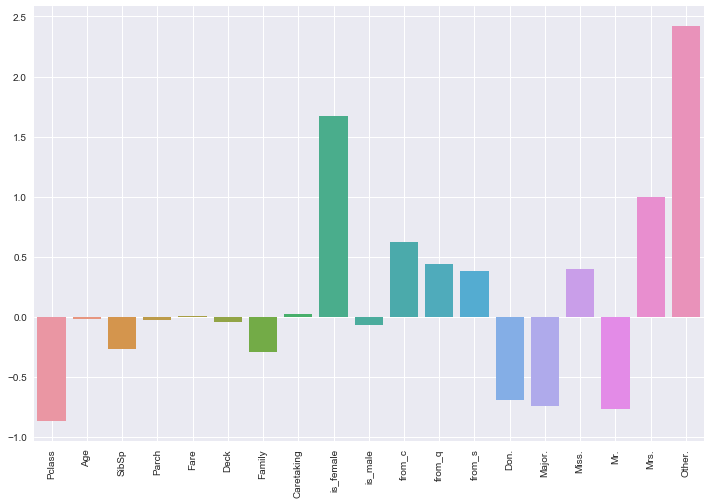

In [239]:
def logistic_regression_features(X, model):
    plt.figure(figsize=(12,8))
    barplot = sns.barplot(x=X.columns, y=model.coef_[0], orient='vertical')
    plt.setp(barplot.get_xticklabels(), rotation=90)
    plt.grid(True)
logistic_regression_features(data3, pipeline.named_steps['logisticregression'])

Но логистичната регресия има хиперпараметър C. Нека пробваме да си поиграем с него.

In [240]:
for c in [0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 100]:
    pipeline = make_pipeline(DropTransformer(), SexTransformer(), EmbarkTransformer(),
                             TitleTransformer(), DeckTransformer(), LogisticRegression(C = c))
    pipeline.fit(X_train, y_train)
    train_score_C_all_columns = pipeline.score(X_train, y_train)
    test_score_C_all_columns  = pipeline.score(X_test,  y_test)
    print("C = {:10.4f} | train = {} | test = {}".format(c, train_score_C_all_columns, test_score_C_all_columns))

C =     0.0010 | train = 0.6976047904191617 | test = 0.6816143497757847
C =     0.0100 | train = 0.781437125748503 | test = 0.7713004484304933
C =     0.0500 | train = 0.8053892215568862 | test = 0.7847533632286996
C =     0.1000 | train = 0.812874251497006 | test = 0.7847533632286996
C =     0.5000 | train = 0.8353293413173652 | test = 0.8071748878923767
C =     1.0000 | train = 0.8368263473053892 | test = 0.8116591928251121
C =     5.0000 | train = 0.8383233532934131 | test = 0.8116591928251121
C =    10.0000 | train = 0.8413173652694611 | test = 0.8116591928251121
C =   100.0000 | train = 0.8413173652694611 | test = 0.8161434977578476


Може би 7.5?

In [305]:
pipeline = make_pipeline(DropTransformer(), SexTransformer(), EmbarkTransformer(),
                         TitleTransformer(), DeckTransformer(), LogisticRegression(C = 7.5))
pipeline.fit(X_train, y_train)
train_score_C_all_columns = pipeline.score(X_train, y_train)
test_score_C_all_columns  = pipeline.score(X_test,  y_test)
print("C = {:10.4f} | train = {} | test = {}".format(7.5, train_score_C_all_columns, test_score_C_all_columns))
best_logistic_regression = pipeline.named_steps['logisticregression']

C =     7.5000 | train = 0.8398203592814372 | test = 0.8116591928251121


Стигнахме до по-добър резултат при train-a. Но няма да се откажем до тук.

### Big guns (pt. 2)

![Big guns THE MASK](https://media2.giphy.com/media/skhAKQNwDSkjm/giphy.gif)

Логистичната регресия е хубав и прост tool, но нека видим какво могат да направят "батковците" му.

### Support Vector Classification 


Нека видим какво ще успее да направи SVC с данните ни.

In [242]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

feature_count = len(X_train.columns)
grid = {'C': [0.1, 0.5, 1.0, 5.0,],
        'kernel': ["linear", "poly", "rbf", "sigmoid"],
        'gamma': [x/feature_count for x in [0.01, 0.1, 1, 10, 100]],
        'max_iter': [5000000],
        'random_state': [0]}
search = GridSearchCV(SVC(), param_grid=grid)

pipeline_list = [ DropTransformer(), SexTransformer(), EmbarkTransformer(),
                  TitleTransformer(), DeckTransformer()]
pipeline = make_pipeline(*pipeline_list)
X_transformed = pipeline.fit_transform(X)

search.fit(X_transformed, y)


/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=5000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=5000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=5000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=5000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklea

/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=5000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=5000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=5000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=5000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklea

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'gamma': [0.0007142857142857143, 0.0071428571428571435, 0.07142857142857142, 0.7142857142857143, 7.142857142857143], 'max_iter': [5000000], 'C': [0.1, 0.5, 1.0, 5.0], 'random_state': [0], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [243]:
result = _
result

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'gamma': [0.0007142857142857143, 0.0071428571428571435, 0.07142857142857142, 0.7142857142857143, 7.142857142857143], 'max_iter': [5000000], 'C': [0.1, 0.5, 1.0, 5.0], 'random_state': [0], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Ohh, that was close, but saved it

In [244]:
pd.DataFrame(result.cv_results_).sort_values('rank_test_score')

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,param_kernel,param_max_iter,param_random_state,params,...,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
68,2.540595,0.004081,0.818182,0.831650,5,0.0714286,linear,5000000,0,"{'gamma': 0.07142857142857142, 'max_iter': 500...",...,0.818182,0.838384,0.821549,0.829966,0.814815,0.826599,0.616619,0.000591,0.002749,0.004956
72,2.605428,0.003278,0.818182,0.831650,5,0.714286,linear,5000000,0,"{'gamma': 0.7142857142857143, 'max_iter': 5000...",...,0.818182,0.838384,0.821549,0.829966,0.814815,0.826599,0.650512,0.000129,0.002749,0.004956
60,2.645844,0.003803,0.818182,0.831650,5,0.000714286,linear,5000000,0,"{'gamma': 0.0007142857142857143, 'max_iter': 5...",...,0.818182,0.838384,0.821549,0.829966,0.814815,0.826599,0.591668,0.000646,0.002749,0.004956
64,2.646490,0.003401,0.818182,0.831650,5,0.00714286,linear,5000000,0,"{'gamma': 0.0071428571428571435, 'max_iter': 5...",...,0.818182,0.838384,0.821549,0.829966,0.814815,0.826599,0.578650,0.000334,0.002749,0.004956
76,2.469864,0.003288,0.818182,0.831650,5,7.14286,linear,5000000,0,"{'gamma': 7.142857142857143, 'max_iter': 50000...",...,0.818182,0.838384,0.821549,0.829966,0.814815,0.826599,0.687920,0.000224,0.002749,0.004956
0,0.167251,0.003779,0.815937,0.826038,0.1,0.000714286,linear,5000000,0,"{'gamma': 0.0007142857142857143, 'max_iter': 5...",...,0.818182,0.835017,0.821549,0.823232,0.808081,0.819865,0.031446,0.000282,0.005723,0.006496
4,0.150824,0.003394,0.815937,0.826038,0.1,0.00714286,linear,5000000,0,"{'gamma': 0.0071428571428571435, 'max_iter': 5...",...,0.818182,0.835017,0.821549,0.823232,0.808081,0.819865,0.027851,0.000050,0.005723,0.006496
8,0.163411,0.003232,0.815937,0.826038,0.1,0.0714286,linear,5000000,0,"{'gamma': 0.07142857142857142, 'max_iter': 500...",...,0.818182,0.835017,0.821549,0.823232,0.808081,0.819865,0.037711,0.000165,0.005723,0.006496
16,0.141088,0.003028,0.815937,0.826038,0.1,7.14286,linear,5000000,0,"{'gamma': 7.142857142857143, 'max_iter': 50000...",...,0.818182,0.835017,0.821549,0.823232,0.808081,0.819865,0.024673,0.000026,0.005723,0.006496
12,0.146385,0.003103,0.815937,0.826038,0.1,0.714286,linear,5000000,0,"{'gamma': 0.7142857142857143, 'max_iter': 5000...",...,0.818182,0.835017,0.821549,0.823232,0.808081,0.819865,0.028168,0.000081,0.005723,0.006496


Като чели гамата няма особено значение и най-добрия kernel е линеен. Нека пуснем малко по-точен search за C с linear kernel и малко повече iterations, за да видим какво ще стане.

In [245]:
grid = {'C': [0.5, 0.6, 0.7, 0.8, 0.9],
        'kernel': ["linear"],
        'max_iter': [10000000],
        'random_state': [0]}
search = GridSearchCV(SVC(), param_grid=grid)

result = search.fit(X_transformed, y)
pd.DataFrame(result.cv_results_).sort_values('rank_test_score')


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_kernel,param_max_iter,param_random_state,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
2,0.808148,0.003718,0.818182,0.830527,0.7,linear,10000000,0,"{'max_iter': 10000000, 'C': 0.7, 'random_state...",1,0.814815,0.838384,0.821549,0.823232,0.818182,0.829966,0.566655,0.000421,0.002749,0.006198
3,0.682829,0.003221,0.818182,0.830527,0.8,linear,10000000,0,"{'max_iter': 10000000, 'C': 0.8, 'random_state...",1,0.814815,0.838384,0.821549,0.823232,0.818182,0.829966,0.499732,0.000182,0.002749,0.006198
4,0.987630,0.003114,0.818182,0.830527,0.9,linear,10000000,0,"{'max_iter': 10000000, 'C': 0.9, 'random_state...",1,0.814815,0.838384,0.821549,0.823232,0.818182,0.829966,0.770315,0.000136,0.002749,0.006198
0,0.524770,0.003993,0.814815,0.827722,0.5,linear,10000000,0,"{'max_iter': 10000000, 'C': 0.5, 'random_state...",4,0.814815,0.838384,0.821549,0.823232,0.808081,0.821549,0.330035,0.000628,0.005498,0.007571
1,0.939408,0.003465,0.814815,0.827722,0.6,linear,10000000,0,"{'max_iter': 10000000, 'C': 0.6, 'random_state...",4,0.814815,0.838384,0.821549,0.823232,0.808081,0.821549,0.852367,0.000069,0.005498,0.007571


Какво ще се случи ако StandardScale-нем данните които имаме?

In [246]:
best_svc_params = result.best_params_

pipeline_list = [ DropTransformer(), SexTransformer(), EmbarkTransformer(),
                  TitleTransformer(), DeckTransformer(), StandardScaler()]
pipeline = make_pipeline(*pipeline_list)

X_transformed = pipeline.fit_transform(X)

X_transformed_train, X_transformed_test, y_train, y_test = train_test_split(X_transformed, y, random_state = 0, stratify = y)

model = SVC(**best_svc_params).fit(X_transformed_train, y_train)
best_svc_standard_score_train = model.score(X_transformed_train, y_train)
best_svc_standard_score_test  = model.score(X_transformed_test,  y_test)

print("Best params SVC train score with standard scaler:", best_svc_standard_score_train)
print("Best params SVC test  score with standard scaler:", best_svc_standard_score_test)

Best params SVC train score with standard scaler: 0.833832335329
Best params SVC test  score with standard scaler: 0.811659192825


Изглежда, че това само намали малко score-a. Ами MinMax?

In [266]:
pipeline_list = [ DropTransformer(), SexTransformer(), EmbarkTransformer(),
                  TitleTransformer(), DeckTransformer(), MinMaxScaler()]
pipeline = make_pipeline(*pipeline_list)

X_transformed = pipeline.fit_transform(X)

X_transformed_train, X_transformed_test, y_train, y_test = train_test_split(X_transformed, y, random_state = 0, stratify = y)

model = SVC(**best_svc_params).fit(X_transformed_train, y_train)
best_svc_minmax_score_train = model.score(X_transformed_train, y_train)
best_svc_minmax_score_test  = model.score(X_transformed_test,  y_test)

print("Best params SVC train score with standard scaler:", best_svc_minmax_score_train)
print("Best params SVC test  score with standard scaler:", best_svc_minmax_score_test)

Best params SVC train score with standard scaler: 0.836826347305
Best params SVC test  score with standard scaler: 0.807174887892


Май е време да се откажа. Нека видим какво ще направи:

### Random Forest Classifier

In [353]:
from sklearn.ensemble import RandomForestClassifier

pipeline_list = [ DropTransformer(), SexTransformer(), EmbarkTransformer(),
                  TitleTransformer(), DeckTransformer()]
pipeline = make_pipeline(*pipeline_list)

X_transformed = pipeline.fit_transform(X)

grid = {'max_depth': [None, 2, 4, 8, 16, 32, 64, 128],
        'n_estimators': [2, 5, 10, 20, 50, 100, 250],
        'max_features': [2, 5, 8, 10, 12, 15, 17, 19],
        'random_state': [0]}
search = GridSearchCV(RandomForestClassifier(), param_grid=grid)
result = search.fit(X_transformed, y)
pd.DataFrame(result.cv_results_).sort_values('rank_test_score')

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_max_features,param_n_estimators,param_random_state,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
151,0.100013,0.006962,0.835017,0.862514,4,15,50,0,"{'n_estimators': 50, 'max_depth': 4, 'random_s...",1,0.831650,0.873737,0.845118,0.855219,0.828283,0.858586,0.005742,0.000823,0.007274,0.008054
115,0.031471,0.003073,0.833895,0.836700,4,2,20,0,"{'n_estimators': 20, 'max_depth': 4, 'random_s...",2,0.821549,0.840067,0.845118,0.833333,0.835017,0.836700,0.000871,0.000034,0.009655,0.002749
202,0.475142,0.028148,0.832772,0.944444,8,12,250,0,"{'n_estimators': 250, 'max_depth': 8, 'random_...",3,0.804714,0.954545,0.855219,0.942761,0.838384,0.936027,0.007584,0.000222,0.020997,0.007653
216,0.519002,0.028251,0.832772,0.949495,8,17,250,0,"{'n_estimators': 250, 'max_depth': 8, 'random_...",3,0.808081,0.961279,0.851852,0.949495,0.838384,0.937710,0.004878,0.000371,0.018305,0.009622
131,0.162076,0.010936,0.832772,0.847924,4,8,100,0,"{'n_estimators': 100, 'max_depth': 4, 'random_...",3,0.818182,0.858586,0.845118,0.846801,0.835017,0.838384,0.006866,0.000012,0.011111,0.008286
159,0.179247,0.010911,0.832772,0.864759,4,17,100,0,"{'n_estimators': 100, 'max_depth': 4, 'random_...",3,0.821549,0.873737,0.848485,0.851852,0.828283,0.868687,0.005685,0.000113,0.011446,0.009357
143,0.035431,0.003198,0.832772,0.858586,4,12,20,0,"{'n_estimators': 20, 'max_depth': 4, 'random_s...",3,0.821549,0.868687,0.841751,0.858586,0.835017,0.848485,0.000384,0.000118,0.008399,0.008247
186,0.091709,0.006751,0.832772,0.934343,8,8,50,0,"{'n_estimators': 50, 'max_depth': 8, 'random_s...",3,0.808081,0.947811,0.858586,0.929293,0.831650,0.925926,0.006975,0.000259,0.020634,0.009622
132,0.413457,0.027307,0.832772,0.851291,4,8,250,0,"{'n_estimators': 250, 'max_depth': 4, 'random_...",3,0.818182,0.863636,0.845118,0.845118,0.835017,0.845118,0.021753,0.002289,0.011111,0.008730
125,0.413873,0.027127,0.831650,0.838384,4,5,250,0,"{'n_estimators': 250, 'max_depth': 4, 'random_...",10,0.821549,0.845118,0.845118,0.833333,0.828283,0.836700,0.026384,0.002275,0.009912,0.004956


In [335]:
X_transformed_for_forest = X_transformed.copy() # Used for debugging

Хич не е зле, нека си го запазим.

In [330]:
best_forest = result.best_estimator_

Интересно ми е какво ще можем да направим с по няколко съседчета върху този dataset. Едва ли ще подобри резултатите постигнати с Random Forest, но все пак нека видим:

### K-nearest neightbours

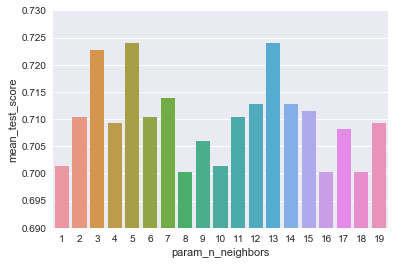

In [328]:
from sklearn.neighbors import KNeighborsClassifier

grid = {'n_neighbors': list(range(1, 20))}
search = GridSearchCV(KNeighborsClassifier(), param_grid=grid)
result = search.fit(X_transformed, y)
neighbours_df = pd.DataFrame(result.cv_results_).sort_values('rank_test_score')

neighbours_plot = sns.barplot(x = neighbours_df['param_n_neighbors'], y  = neighbours_df['mean_test_score'])
neighbours_plot.set(ylim=(0.69, 0.73));

Както очаквахме не повишихме score-а, но пък вметнахме още една графика, с който да изглеждаме по-fancy!

## Test set

Време е да видим какво ще можем да направим със test set-a. Ще import-нем тест сета, ще се опитаме да го прекараме през всички трансформатори и ще се надяваме че kaggle, ще хареса резултатите ни и ще ни постави една идея над `2793` място.

In [252]:
test_data = pd.read_csv('test.csv', index_col='PassengerId')
test_data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C


Факта че не всичко което правихме до момента върху данните е в Transformer-и не ме радва, но се надявам, че тези които имаме ще помогнат достатъчно.

In [253]:
transformed_test_data = AddTitleTransformer().transform(test_data)

transformed_test_data = fit_transform_cabin_to_deck(transformed_test_data)

transformed_test_data['Family'] = transformed_test_data['SibSp'] + transformed_test_data['Parch']
transformed_test_data['Caretaking'] = (transformed_test_data['Sex'] == 'female').replace(False, -1) * transformed_test_data['Family']
transformed_test_data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck,Family,Caretaking
PassengerId,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Mr.,Z,0,-0.0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,Mrs.,Z,1,1.0
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,Mr.,Z,0,-0.0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,Mr.,Z,0,-0.0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,Mrs.,Z,2,2.0
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,S,Mr.,Z,0,-0.0
898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,Q,Miss.,Z,0,0.0
899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,S,Mr.,Z,2,-2.0
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,C,Mrs.,Z,0,0.0


Стигнахме до предвиждането на възръстта:

In [263]:
na_age_rows = transformed_test_data[transformed_test_data['Age'].isna()]
na_age_rows[numeric_columns.drop(['Survived', 'Age'])]
test_age_predictions = age_estimator.predict(na_age_rows[numeric_columns.drop(['Survived', 'Age'])])
test_age_predictions
transformed_test_data.loc[transformed_test_data['Age'].isna(), 'Age'] = test_age_predictions

ValueError: Found array with 0 sample(s) (shape=(0, 6)) while a minimum of 1 is required.

In [264]:
transformed_test_data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck,Family,Caretaking
PassengerId,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,Q,Mr.,Z,0,-0.0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,S,Mrs.,Z,1,1.0
894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,Q,Mr.,Z,0,-0.0
895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,S,Mr.,Z,0,-0.0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,S,Mrs.,Z,2,2.0
897,3,"Svensson, Mr. Johan Cervin",male,14.000000,0,0,7538,9.2250,S,Mr.,Z,0,-0.0
898,3,"Connolly, Miss. Kate",female,30.000000,0,0,330972,7.6292,Q,Miss.,Z,0,0.0
899,2,"Caldwell, Mr. Albert Francis",male,26.000000,1,1,248738,29.0000,S,Mr.,Z,2,-2.0
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.000000,0,0,2657,7.2292,C,Mrs.,Z,0,0.0


In [342]:
pipeline_list = [ DropTransformer(), SexTransformer(), EmbarkTransformer(),
                  TitleTransformer(), DeckTransformer()]
pipeline = make_pipeline(*pipeline_list)

test_transformed = pipeline.fit_transform(transformed_test_data)
test_transformed

,Pclass,Age,SibSp,Parch,Fare,Deck,Family,Caretaking,is_female,is_male,from_c,from_q,from_s,Don.,Major.,Miss.,Mr.,Mrs.,Other.
PassengerId,,,,,,,,,,,,,,,,,,,
892,3,34.500000,0,0,7.8292,7,0,-0.0,False,True,False,True,False,False,False,False,True,False,False
893,3,47.000000,1,0,7.0000,7,1,1.0,True,False,False,False,True,False,False,False,False,True,False
894,2,62.000000,0,0,9.6875,7,0,-0.0,False,True,False,True,False,False,False,False,True,False,False
895,3,27.000000,0,0,8.6625,7,0,-0.0,False,True,False,False,True,False,False,False,True,False,False
896,3,22.000000,1,1,12.2875,7,2,2.0,True,False,False,False,True,False,False,False,False,True,False
897,3,14.000000,0,0,9.2250,7,0,-0.0,False,True,False,False,True,False,False,False,True,False,False
898,3,30.000000,0,0,7.6292,7,0,0.0,True,False,False,True,False,False,False,True,False,False,False
899,2,26.000000,1,1,29.0000,7,2,-2.0,False,True,False,False,True,False,False,False,True,False,False
900,3,18.000000,0,0,7.2292,7,0,0.0,True,False,True,False,False,False,False,False,False,True,False


... _drumroll_ ...

In [343]:
results = best_forest.predict(test_transformed)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

Yet another definition of anticlimactic ...

In [344]:
{column: test_transformed[column].isna().sum() for column in test_transformed.columns if test_transformed[column].isna().sum() != 0 }

{'Fare': 1}

Това беше грубо ... Нека видим нашия тайнствен пътник:

In [345]:
test_transformed[test_transformed['Fare'].isna()]

,Pclass,Age,SibSp,Parch,Fare,Deck,Family,Caretaking,is_female,is_male,from_c,from_q,from_s,Don.,Major.,Miss.,Mr.,Mrs.,Other.
PassengerId,,,,,,,,,,,,,,,,,,,
1044,3,60.5,0,0,NaN,7,0,-0.0,False,True,False,False,True,False,False,False,True,False,False


Ще му добавим mean-a на всички с титлата мистър и deck 7

In [346]:
fare_not_na = test_transformed[test_transformed['Fare'].notna()]
misters = fare_not_na[fare_not_na['Mr.'] == True]
class_3 = misters[misters['Pclass'] == 3]
from_s  = class_3[class_3['from_s'] == True]
mean_fare = from_s['Fare'].mean()

test_transformed[test_transformed['Fare'].isna()] = mean_fare

In [347]:
results = best_forest.predict(test_transformed)

frame = pd.DataFrame({
    'PassengerId': pd.read_csv('test.csv').PassengerId,
    'Survived': results
})
frame = frame.set_index('PassengerId')
frame.to_csv('predictions.csv')

... _yet antoher drumroll_ ...

And it seems that something very wrong happened ... 
A titanic failure indeed: 0.6220

Преди напълно да съм се отчаял ще пусна и един baseline върху теста с logistic regression-a, който бяхме намерили по-рано.

In [309]:
results = best_logistic_regression.predict(test_transformed)

frame = pd.DataFrame({
    'PassengerId': pd.read_csv('test.csv').PassengerId,
    'Survived': results
})
frame = frame.set_index('PassengerId')
frame.to_csv('predictions_logistic.csv')

С това стигнахме до 0.77511, което е значително по-приемлив score. Но какво се обърка с малката ни, хубава, горичка?
Може би ще разберем с още малко плагиатство.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

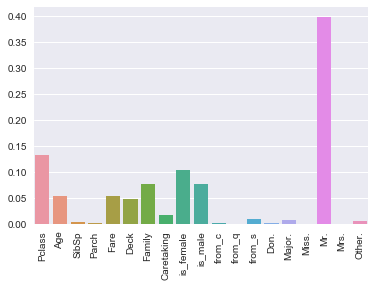

In [351]:
def random_forest_features(model, X):
    importances = model.feature_importances_
    std = np.std([model.feature_importances_ for tree in model.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 10))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), X.columns, rotation='vertical')
    plt.xlim([-1, X.shape[1]])
    plt.show()
    
forest_plot = sns.barplot(y = best_forest.feature_importances_, x = test_transformed.columns)
plt.xticks(rotation = 90)


In [340]:
print(X_transformed_for_forest.columns, transformed_test_data.columns)

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Deck', 'Family',
       'Caretaking', 'is_female', 'is_male', 'from_c', 'from_q', 'from_s',
       'Don.', 'Major.', 'Miss.', 'Mr.', 'Mrs.', 'Other.'],
      dtype='object') Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked', 'Title', 'Deck', 'Family', 'Caretaking'],
      dtype='object')


Може би твърде многото N/A стойности който encode-нахме в Deck, не влиаят добре на модела? Нека пак пуснем да се правят горички, но този път без Deck

In [355]:
pipeline_list = [ DropTransformer(), SexTransformer(), EmbarkTransformer(), TitleTransformer()]
pipeline = make_pipeline(*pipeline_list)

X_transformed = pipeline.fit_transform(X.drop(['Deck'], axis = 1))

grid = {'max_depth': [2, 4, 8, 16],
        'n_estimators': [10, 20, 50, 100, 250],
        'max_features': [2, 5, 8, 10, 12, 15, 17, 18],
        'random_state': [0]}
search = GridSearchCV(RandomForestClassifier(), param_grid=grid)
result = search.fit(X_transformed, y)
pd.DataFrame(result.cv_results_).sort_values('rank_test_score')

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_max_features,param_n_estimators,param_random_state,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
92,0.092342,0.006677,0.837262,0.926487,8,8,50,0,"{'n_estimators': 50, 'max_depth': 8, 'random_s...",1,0.821549,0.939394,0.861953,0.917508,0.828283,0.922559,0.004658,0.000128,0.017675,0.009357
108,0.282673,0.015454,0.836139,0.941077,8,15,100,0,"{'n_estimators': 100, 'max_depth': 8, 'random_...",2,0.808081,0.952862,0.861953,0.941077,0.838384,0.929293,0.026520,0.001168,0.022050,0.009622
53,0.163205,0.011352,0.833895,0.842873,4,8,100,0,"{'n_estimators': 100, 'max_depth': 4, 'random_...",3,0.824916,0.848485,0.845118,0.838384,0.831650,0.841751,0.004938,0.000397,0.008399,0.004199
114,0.568975,0.029353,0.833895,0.945567,8,17,250,0,"{'n_estimators': 250, 'max_depth': 8, 'random_...",3,0.804714,0.964646,0.861953,0.942761,0.835017,0.929293,0.031929,0.001447,0.023381,0.014569
54,0.413055,0.027633,0.833895,0.842873,4,8,250,0,"{'n_estimators': 250, 'max_depth': 4, 'random_...",3,0.821549,0.848485,0.845118,0.836700,0.835017,0.843434,0.014109,0.001324,0.009655,0.004827
109,0.567650,0.030569,0.833895,0.945567,8,15,250,0,"{'n_estimators': 250, 'max_depth': 8, 'random_...",3,0.804714,0.959596,0.861953,0.942761,0.835017,0.934343,0.042694,0.003125,0.023381,0.010498
66,0.051150,0.003626,0.833895,0.865320,4,15,20,0,"{'n_estimators': 20, 'max_depth': 4, 'random_s...",3,0.824916,0.882155,0.851852,0.855219,0.824916,0.858586,0.008185,0.000478,0.012698,0.011983
103,0.236901,0.015549,0.833895,0.941077,8,12,100,0,"{'n_estimators': 100, 'max_depth': 8, 'random_...",3,0.801347,0.954545,0.858586,0.936027,0.841751,0.932660,0.008157,0.002386,0.024019,0.009622
79,0.448728,0.025458,0.832772,0.863636,4,18,250,0,"{'n_estimators': 250, 'max_depth': 4, 'random_...",9,0.824916,0.880471,0.851852,0.856902,0.821549,0.853535,0.001223,0.000203,0.013561,0.011983
48,0.237634,0.015708,0.832772,0.838945,4,5,100,0,"{'n_estimators': 100, 'max_depth': 4, 'random_...",9,0.821549,0.843434,0.845118,0.835017,0.831650,0.838384,0.008836,0.001141,0.009655,0.003459


Това малко подобри mean_test_score-a на нашия модел.

In [357]:
best_forest = result.best_estimator_

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

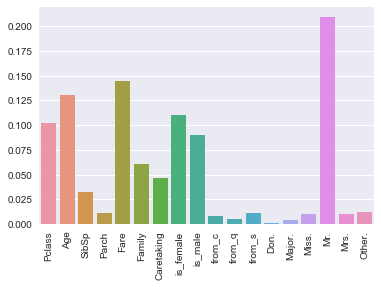

In [359]:
forest_plot = sns.barplot(y = best_forest.feature_importances_, x = test_transformed.columns.drop('Deck'))
plt.xticks(rotation = 90)

Това от къде са се качили не би трябвало да има голямо значение за оцеляването им по средата на Атлантика. Нека видим дали тази информация не внася шум.

In [377]:
pipeline_list = [ DropTransformer(), SexTransformer(), TitleTransformer()]
pipeline = make_pipeline(*pipeline_list)

X_transformed = pipeline.fit_transform(X.drop(['Deck', 'Embarked'], axis = 1))

grid = {'max_depth': [2, 4, 8, 16],
        'n_estimators': [10, 20, 50, 100, 250],
        'max_features': [2, 5, 8, 10, 12, 15],
        'random_state': [0]}
search = GridSearchCV(RandomForestClassifier(), param_grid=grid)
result = search.fit(X_transformed, y)
yet_another_forest = result.best_estimator_
pd.DataFrame(result.cv_results_).sort_values('rank_test_score')

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_max_features,param_n_estimators,param_random_state,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
46,0.039088,0.003121,0.839506,0.854658,4,10,20,0,"{'n_estimators': 20, 'max_depth': 4, 'random_s...",1,0.831650,0.872054,0.848485,0.841751,0.838384,0.850168,0.005075,0.000175,0.006919,0.012772
51,0.037855,0.003097,0.838384,0.856341,4,12,20,0,"{'n_estimators': 20, 'max_depth': 4, 'random_s...",2,0.821549,0.868687,0.858586,0.846801,0.835017,0.853535,0.002408,0.000083,0.015307,0.009152
59,0.446993,0.025883,0.837262,0.863075,4,15,250,0,"{'n_estimators': 250, 'max_depth': 4, 'random_...",3,0.828283,0.880471,0.855219,0.856902,0.828283,0.851852,0.002956,0.000744,0.012698,0.012473
63,0.159061,0.011696,0.835017,0.910213,8,2,100,0,"{'n_estimators': 100, 'max_depth': 8, 'random_...",4,0.821549,0.927609,0.855219,0.895623,0.828283,0.907407,0.005709,0.000032,0.014547,0.013208
58,0.186906,0.011119,0.835017,0.860269,4,15,100,0,"{'n_estimators': 100, 'max_depth': 4, 'random_...",4,0.821549,0.875421,0.845118,0.848485,0.838384,0.856902,0.011801,0.000483,0.009912,0.011251
38,0.159866,0.012524,0.833895,0.838384,4,5,100,0,"{'n_estimators': 100, 'max_depth': 4, 'random_...",6,0.821549,0.845118,0.845118,0.833333,0.835017,0.836700,0.005249,0.002043,0.009655,0.004956
73,0.177769,0.011787,0.833895,0.928732,8,8,100,0,"{'n_estimators': 100, 'max_depth': 8, 'random_...",6,0.808081,0.947811,0.855219,0.914141,0.838384,0.924242,0.003572,0.000060,0.019504,0.014108
39,0.388614,0.025760,0.833895,0.836700,4,5,250,0,"{'n_estimators': 250, 'max_depth': 4, 'random_...",6,0.821549,0.841751,0.845118,0.831650,0.835017,0.836700,0.002457,0.000795,0.009655,0.004124
68,0.170874,0.011949,0.833895,0.921998,8,5,100,0,"{'n_estimators': 100, 'max_depth': 8, 'random_...",6,0.804714,0.937710,0.858586,0.909091,0.838384,0.919192,0.006801,0.000340,0.022221,0.011851
67,0.084862,0.006840,0.833895,0.921998,8,5,50,0,"{'n_estimators': 50, 'max_depth': 8, 'random_s...",6,0.804714,0.934343,0.858586,0.914141,0.838384,0.917508,0.003971,0.000337,0.022221,0.008837


Продължаваме да вдигаме score-a na горичките, но дали тези промени ще повлияят на логистичната регресия.

In [363]:
grid = {'C': [0.01, 0.1, 1, 2.5 , 5, 6, 7.5, 8, 10, 100]}
search = GridSearchCV(LogisticRegression(), param_grid=grid)
result = search.fit(X_transformed, y)
pd.DataFrame(result.cv_results_).sort_values('rank_test_score')

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
3,0.005417,0.000954,0.822671,0.829405,2.5,{'C': 2.5},1,0.811448,0.831650,0.821549,0.826599,0.835017,0.829966,0.000072,0.000007,0.009655,0.002100
2,0.006010,0.001162,0.821549,0.830527,1,{'C': 1},2,0.811448,0.836700,0.818182,0.824916,0.835017,0.829966,0.000373,0.000087,0.009912,0.004827
5,0.007205,0.001109,0.820426,0.831650,6,{'C': 6},3,0.808081,0.836700,0.821549,0.829966,0.831650,0.828283,0.001054,0.000343,0.009655,0.003637
6,0.004845,0.000814,0.820426,0.831650,7.5,{'C': 7.5},3,0.808081,0.836700,0.818182,0.829966,0.835017,0.828283,0.000166,0.000038,0.011111,0.003637
7,0.004564,0.000780,0.820426,0.831650,8,{'C': 8},3,0.808081,0.836700,0.818182,0.829966,0.835017,0.828283,0.000097,0.000026,0.011111,0.003637
4,0.005428,0.001171,0.819304,0.831089,5,{'C': 5},6,0.804714,0.835017,0.821549,0.829966,0.831650,0.828283,0.000168,0.000303,0.011111,0.002861
8,0.004523,0.000806,0.819304,0.831650,10,{'C': 10},6,0.808081,0.836700,0.814815,0.829966,0.835017,0.828283,0.000088,0.000077,0.011446,0.003637
9,0.005014,0.000778,0.819304,0.831089,100,{'C': 100},6,0.804714,0.836700,0.818182,0.828283,0.835017,0.828283,0.000269,0.000022,0.012397,0.003968
1,0.005776,0.001275,0.801347,0.807520,0.1,{'C': 0.1},9,0.794613,0.814815,0.808081,0.801347,0.801347,0.806397,0.000375,0.000134,0.005498,0.005555
0,0.006899,0.001520,0.766554,0.771605,0.01,{'C': 0.01},10,0.754209,0.787879,0.771044,0.754209,0.774411,0.772727,0.001189,0.000024,0.008837,0.013769


Излгежда че повишихме малко скора и при логистичната регресия. Може би да пробваме отново и да видим мнението на kaggle?

In [369]:
yet_another_logistic_estimator = result.best_estimator_

In [376]:
test_transformed_2 = test_transformed.drop(['Deck', 'from_s', 'from_c', 'from_q'], axis = 1)

results = yet_another_logistic_estimator.predict(test_transformed_2)

frame = pd.DataFrame({
    'PassengerId': pd.read_csv('test.csv').PassengerId,
    'Survived': results
})
frame = frame.set_index('PassengerId')
frame.to_csv('predictions_logistic_2.csv')

![are you kidding me](images/are_you_kidding_me.png)
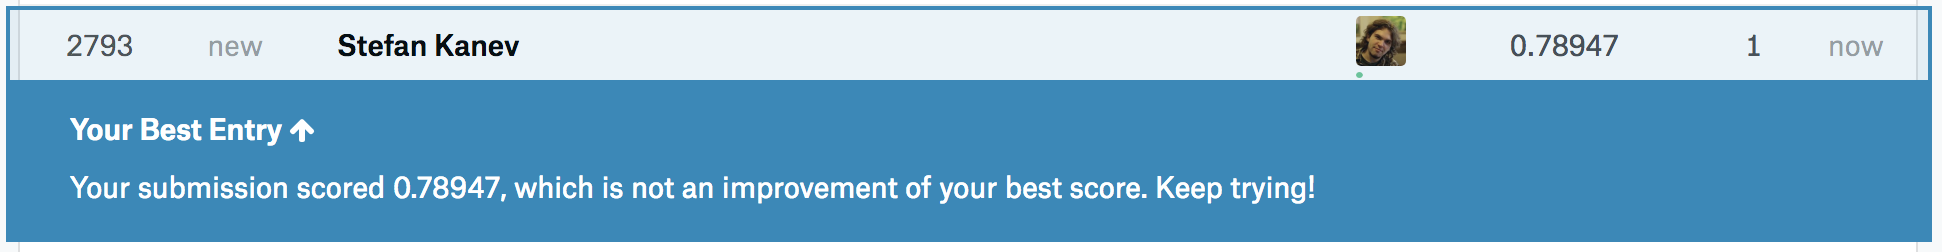

![what?!?](https://m.popkey.co/768c16/DeVGr.gif)

In [378]:
results = yet_another_forest.predict(test_transformed_2)

frame = pd.DataFrame({
    'PassengerId': pd.read_csv('test.csv').PassengerId,
    'Survived': results
})
frame = frame.set_index('PassengerId')
frame.to_csv('predictions_forest_2.csv')

0.775, не е improvement, така че ще трябва да направим още нещо ...

## Поуки

1. (Най-важно). Не sink-вай няколко часа работа в подобряване на feature, който е незначим за текущия модел. Опитвай се да намираш feature importance навреме.
2. Да си пишеш трансформъри може да е полезно. В случая тези са твърде специфични за use case-a, но пак вършат работа.
3. Не бутай твърде много параметри на grid search с SVC
4. Това че в първоначалните данни нямаме липсващи стойности по даден feature, не означава че в данните който ще predict-ваме, няма да имаме N/As.